# PSF Modeling with Actual Kernel

To model the PSF, I think the best way is to treat the PSF like a probably distribution such that, for each photon, we sample the probably distribution to determine the deviation in pixel position $\delta_x$ from the nominal pixel position $x_0$. In the absence of any PSF, this function should be a dirac delta function centered at $x=0$ such that the probably of zero deviation from the nominal position is 1. Additionally, the integral of this function over all $x$ must always be 1.

In [1]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

#from astropy.convolution.kernels import Gaussian1DKernel, Gaussian2DKernel

import mocksipipeline.instrument.configuration

In [2]:
moxsi = mocksipipeline.instrument.configuration.moxsi_slot

In [15]:
#selected_wave = [5, 10, 17, 30, 44, 55, 8] * u.AA
selected_wave = np.linspace(5,50,1000) * u.AA

In [25]:
psf_kernel = moxsi['spectrogram_slot_-11'].psf

In [40]:
psf_kernel[0].data.flatten()

array([9.63357573e-06, 9.07647014e-06, 8.52772737e-06, ...,
       8.52772737e-06, 9.07647014e-06, 9.63357573e-06])

In [46]:
psf_kernel.delta_pixel_y.broadcast_like(psf_kernel[0]).data

array([[-27.85575613, -27.85575613, -27.85575613, ..., -27.85575613,
        -27.85575613, -27.85575613],
       [-27.83707353, -27.83707353, -27.83707353, ..., -27.83707353,
        -27.83707353, -27.83707353],
       [-27.81839094, -27.81839094, -27.81839094, ..., -27.81839094,
        -27.81839094, -27.81839094],
       ...,
       [ 27.81839094,  27.81839094,  27.81839094, ...,  27.81839094,
         27.81839094,  27.81839094],
       [ 27.83707353,  27.83707353,  27.83707353, ...,  27.83707353,
         27.83707353,  27.83707353],
       [ 27.85575613,  27.85575613,  27.85575613, ...,  27.85575613,
         27.85575613,  27.85575613]])

In [11]:
import xarray

In [12]:
foo = xarray.open_dataarray('/Users/wtbarnes/Documents/codes/mocksipipeline/mocksipipeline/instrument/optics/data/psf_short_tube_slot_311.nc',
                            chunks={'wavelength':1})

In [19]:
foo_interp = foo.interp(wavelength=selected_wave.to_value(foo.wavelength.attrs['unit']),
                        method='nearest', kwargs={'fill_value': 'extrapolate'})

In [18]:
foo

<xarray.DataArray (wavelength: 4, y: 2983, x: 2983)>
dask.array<open_dataset-__xarray_dataarray_variable__, shape=(4, 2983, 2983), dtype=float64, chunksize=(1, 2983, 2983), chunktype=numpy.ndarray>
Coordinates:
  * x              (x) float64 -195.0 -194.9 -194.7 -194.6 ... 194.7 194.9 195.0
  * y              (y) float64 -195.0 -194.9 -194.7 -194.6 ... 194.7 194.9 195.0
    delta_pixel_x  (x) float64 dask.array<chunksize=(2983,), meta=np.ndarray>
    delta_pixel_y  (y) float64 dask.array<chunksize=(2983,), meta=np.ndarray>
  * wavelength     (wavelength) float64 10.0 25.0 50.0 75.0

In [34]:
(psf_kernel / psf_kernel.sum(dim=['x','y']))

<xarray.DataArray (wavelength: 4, y: 2983, x: 2983)>
array([[[2.28782998e-11, 2.15552574e-11, 2.02520755e-11, ...,
         2.02520755e-11, 2.15552574e-11, 2.28782998e-11],
        [1.25242097e-11, 1.11791438e-11, 1.00157666e-11, ...,
         1.00157666e-11, 1.11791438e-11, 1.25242097e-11],
        [8.07923183e-12, 8.09785726e-12, 8.29212475e-12, ...,
         8.29212475e-12, 8.09785726e-12, 8.07923183e-12],
        ...,
        [8.07923183e-12, 8.09785726e-12, 8.29212475e-12, ...,
         8.29212475e-12, 8.09785726e-12, 8.07923183e-12],
        [1.25242097e-11, 1.11791438e-11, 1.00157666e-11, ...,
         1.00157666e-11, 1.11791438e-11, 1.25242097e-11],
        [2.28782998e-11, 2.15552574e-11, 2.02520755e-11, ...,
         2.02520755e-11, 2.15552574e-11, 2.28782998e-11]],

       [[3.94300452e-11, 3.90261871e-11, 3.86093240e-11, ...,
         3.86093240e-11, 3.90261871e-11, 3.94300452e-11],
        [2.47235186e-11, 2.44277880e-11, 2.42185470e-11, ...,
         2.42185470e-11, 2.44277880e-11, 2.47235186e-11],
        [2.71417875e-11, 2.75793882e-11, 2.80943333e-11, ...,
         2.80943333e-11, 2.75793882e-11, 2.71417875e-11],
...
        [1.08834988e-10, 1.09064754e-10, 1.09273217e-10, ...,
         1.09273217e-10, 1.09064754e-10, 1.08834988e-10],
        [1.21645864e-10, 1.22009974e-10, 1.22304078e-10, ...,
         1.22304078e-10, 1.22009974e-10, 1.21645864e-10],
        [1.22401969e-10, 1.23139842e-10, 1.23814794e-10, ...,
         1.23814794e-10, 1.23139842e-10, 1.22401969e-10]],

       [[9.63224220e-11, 9.63174589e-11, 9.63124958e-11, ...,
         9.63124958e-11, 9.63174589e-11, 9.63224220e-11],
        [8.82998701e-11, 8.84812240e-11, 8.86625779e-11, ...,
         8.86625779e-11, 8.84812240e-11, 8.82998701e-11],
        [8.02773181e-11, 8.06449891e-11, 8.10126601e-11, ...,
         8.10126601e-11, 8.06449891e-11, 8.02773181e-11],
        ...,
        [8.02773181e-11, 8.06449891e-11, 8.10126601e-11, ...,
         8.10126601e-11, 8.06449891e-11, 8.02773181e-11],
        [8.82998701e-11, 8.84812240e-11, 8.86625779e-11, ...,
         8.86625779e-11, 8.84812240e-11, 8.82998701e-11],
        [9.63224220e-11, 9.63174589e-11, 9.63124958e-11, ...,
         9.63124958e-11, 9.63174589e-11, 9.63224220e-11]]])
Coordinates:
  * x              (x) float64 -195.0 -194.9 -194.7 -194.6 ... 194.7 194.9 195.0
  * y              (y) float64 -195.0 -194.9 -194.7 -194.6 ... 194.7 194.9 195.0
    delta_pixel_x  (x) float64 ...
    delta_pixel_y  (y) float64 ...
  * wavelength     (wavelength) float64 10.0 25.0 50.0 75.0

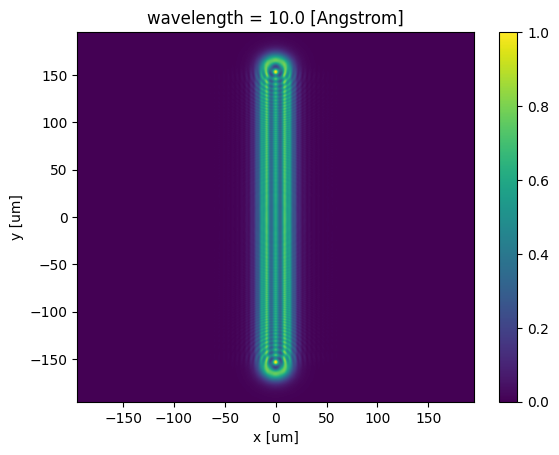

In [17]:
foo.sel(wavelength=5,method='nearest').plot()

In [ ]:
foo_interp[0].data.compute()

In [7]:
psf_kernel_slice = psf_kernel.interp(wavelength=selected_wave.to_value(psf_kernel.wavelength.attrs['unit']),
                                     method='nearest', kwargs={'fill_value': 'extrapolate'})

In [8]:
psf_kernel_slice

<xarray.DataArray (wavelength: 1000, y: 2983, x: 2983)>
array([[[9.63357573e-06, 9.07647014e-06, 8.52772737e-06, ...,
         8.52772737e-06, 9.07647014e-06, 9.63357573e-06],
        [5.27368398e-06, 4.70730474e-06, 4.21743079e-06, ...,
         4.21743079e-06, 4.70730474e-06, 5.27368398e-06],
        [3.40199632e-06, 3.40983910e-06, 3.49164110e-06, ...,
         3.49164110e-06, 3.40983910e-06, 3.40199632e-06],
        ...,
        [3.40199632e-06, 3.40983910e-06, 3.49164110e-06, ...,
         3.49164110e-06, 3.40983910e-06, 3.40199632e-06],
        [5.27368398e-06, 4.70730474e-06, 4.21743079e-06, ...,
         4.21743079e-06, 4.70730474e-06, 5.27368398e-06],
        [9.63357573e-06, 9.07647014e-06, 8.52772737e-06, ...,
         8.52772737e-06, 9.07647014e-06, 9.63357573e-06]],

       [[9.63357573e-06, 9.07647014e-06, 8.52772737e-06, ...,
         8.52772737e-06, 9.07647014e-06, 9.63357573e-06],
        [5.27368398e-06, 4.70730474e-06, 4.21743079e-06, ...,
         4.21743079e-06, 4.70730474e-06, 5.27368398e-06],
        [3.40199632e-06, 3.40983910e-06, 3.49164110e-06, ...,
         3.49164110e-06, 3.40983910e-06, 3.40199632e-06],
...
        [4.25896993e-05, 4.26796125e-05, 4.27611888e-05, ...,
         4.27611888e-05, 4.26796125e-05, 4.25896993e-05],
        [4.76028975e-05, 4.77453825e-05, 4.78604720e-05, ...,
         4.78604720e-05, 4.77453825e-05, 4.76028975e-05],
        [4.78987794e-05, 4.81875262e-05, 4.84516512e-05, ...,
         4.84516512e-05, 4.81875262e-05, 4.78987794e-05]],

       [[4.78987794e-05, 4.81875262e-05, 4.84516512e-05, ...,
         4.84516512e-05, 4.81875262e-05, 4.78987794e-05],
        [4.76028975e-05, 4.77453825e-05, 4.78604720e-05, ...,
         4.78604720e-05, 4.77453825e-05, 4.76028975e-05],
        [4.25896993e-05, 4.26796125e-05, 4.27611888e-05, ...,
         4.27611888e-05, 4.26796125e-05, 4.25896993e-05],
        ...,
        [4.25896993e-05, 4.26796125e-05, 4.27611888e-05, ...,
         4.27611888e-05, 4.26796125e-05, 4.25896993e-05],
        [4.76028975e-05, 4.77453825e-05, 4.78604720e-05, ...,
         4.78604720e-05, 4.77453825e-05, 4.76028975e-05],
        [4.78987794e-05, 4.81875262e-05, 4.84516512e-05, ...,
         4.84516512e-05, 4.81875262e-05, 4.78987794e-05]]])
Coordinates:
  * x              (x) float64 -195.0 -194.9 -194.7 -194.6 ... 194.7 194.9 195.0
  * y              (y) float64 -195.0 -194.9 -194.7 -194.6 ... 194.7 194.9 195.0
    delta_pixel_x  (x) float64 -27.86 -27.84 -27.82 -27.8 ... 27.82 27.84 27.86
    delta_pixel_y  (y) float64 -27.86 -27.84 -27.82 -27.8 ... 27.82 27.84 27.86
  * wavelength     (wavelength) float64 5.0 5.045 5.09 ... 49.91 49.95 50.0

In [8]:
x_variation = psf_kernel_slice[0].delta_pixel_x.broadcast_like(psf_kernel_slice[0])
y_variation = psf_kernel_slice[0].delta_pixel_y.broadcast_like(psf_kernel_slice[0])

In [38]:
sample_indices = np.random.choice(psf_kernel_slice[0].data.size,
                                  size=100000,
                                  p=(psf_kernel_slice[0].data/psf_kernel_slice[0].data.sum()).flatten())
sample_indices = np.unravel_index(sample_indices, psf_kernel_slice[0].data.shape)
sample_variations = np.array([x_variation.data[sample_indices], y_variation.data[sample_indices]])
#print(sample_variations)

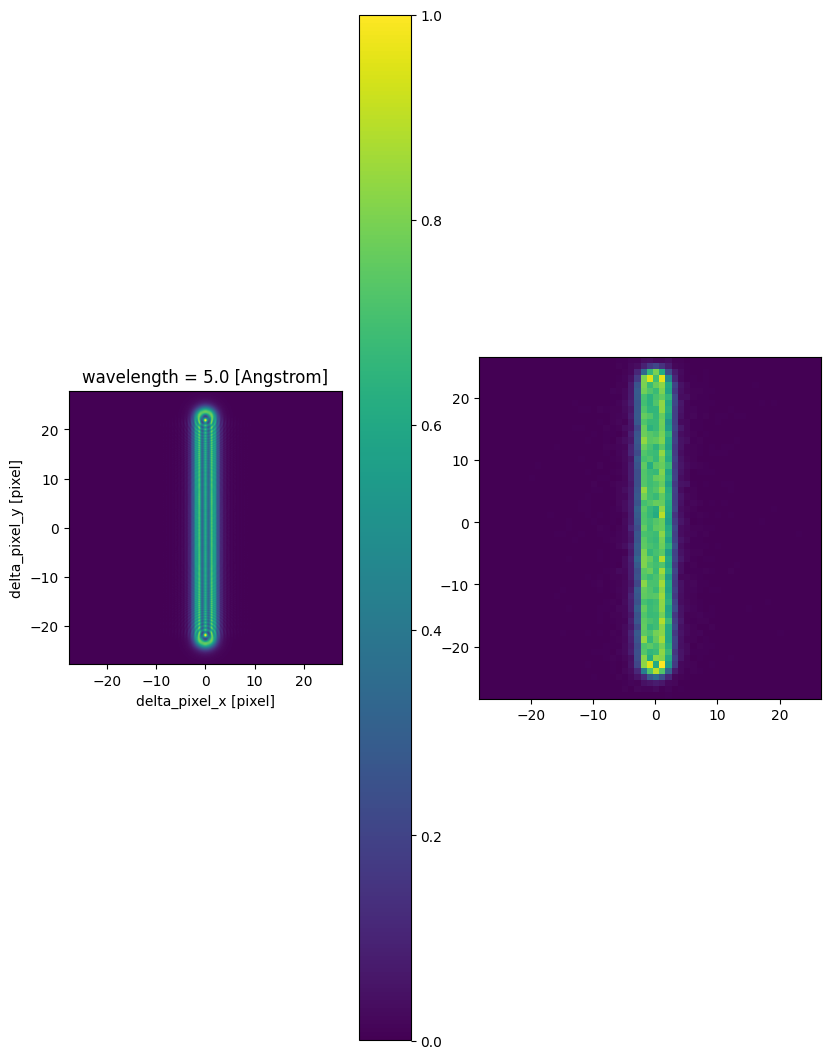

In [46]:
fig = plt.figure(figsize=(15,20))
ax = fig.add_subplot(131, aspect='equal')
psf_kernel_slice[0].plot(ax=ax,x='delta_pixel_x',y='delta_pixel_y')

ax = fig.add_subplot(132,aspect='equal')
res,_,_,_ = ax.hist2d(
    sample_variations[0],sample_variations[1],
    bins=(np.arange(x_variation.data[0,0],x_variation.data[0,-1],1)-0.5,
          np.arange(y_variation.data[0,0],y_variation.data[-1,0],1)-0.5),
    #density=True,
    #vmin=0,vmax=1
)
#ax = fig.add_subplot(133, aspect='equal')
#ax.imshow(g2d.array-res.T, origin='lower', vmin=-0.015, vmax=0.015, cmap='RdBu')

Now, let's try to build a kernel that more closely appoximates the MOXSI slot

First, define a function that does the sampling on any given kernel. The kernel is assumed to be defined on the detector plane.

In [8]:
def sample_psf_2d(kernel, n_samples, plot_kernel=False):
    """
    Sample a PSF to find the position variation for a number of incoming photons
    """
    x_variation = np.arange(kernel.shape[1]) - kernel.center[1] + 0.5*(~kernel.shape[1]%2)
    y_variation = np.arange(kernel.shape[0]) - kernel.center[0] + 0.5*(~kernel.shape[0]%2)
    x_variation_grid, y_variation_grid = np.meshgrid(x_variation,y_variation)
    sample_indices = np.random.choice(kernel.array.size, size=n_samples, p=kernel.array.flatten())
    sample_indices = np.unravel_index(sample_indices, kernel.shape)
    sample_variations = np.array([x_variation_grid[sample_indices], y_variation_grid[sample_indices]])
    if plot_kernel:
        fig = plt.figure(figsize=(15,20))
        ax = fig.add_subplot(131, aspect='equal')
        im = ax.imshow(kernel,origin='lower',vmin=0,vmax=0.015)
        ax = fig.add_subplot(132,aspect='equal')
        res,_,_,_ = ax.hist2d(sample_variations[0],sample_variations[1],
                              bins=(np.arange(x_variation[0],x_variation[-1]+2,1)-0.5,
                                    np.arange(y_variation[0],y_variation[-1]+2,1)-0.5),
                              density=True,
                              vmin=0,
                              vmax=0.015)
        ax.axvline(x=0, color='r', ls='--')
        ax.axhline(y=0, color='r', ls='--')
        ax = fig.add_subplot(133, aspect='equal')
        ax.imshow(kernel.array-res.T, origin='lower', vmin=-0.015, vmax=0.015, cmap='RdBu')
    else:
        return sample_variations

In [9]:
from astropy.modeling.models import Box2D
from astropy.convolution.kernels import Model2DKernel
from astropy.stats import gaussian_fwhm_to_sigma

from mocksipipeline.instrument.configuration import moxsi_slot

In [16]:
slot_width = moxsi_slot.channel_list[30].aperture.psf_fwhm[::-1] * gaussian_fwhm_to_sigma / moxsi_slot.optical_design.spatial_plate_scale
slot_width = slot_width.to_value('pixel')
slot_model = Box2D(1/(slot_width[0]*slot_width[1]), x_width=slot_width[0], y_width=slot_width[1])
slot_kernel = Model2DKernel(slot_model, x_size=int(5*slot_width[0]), y_size=int(2*slot_width[1]), mode='center')
slot_kernel.normalize()

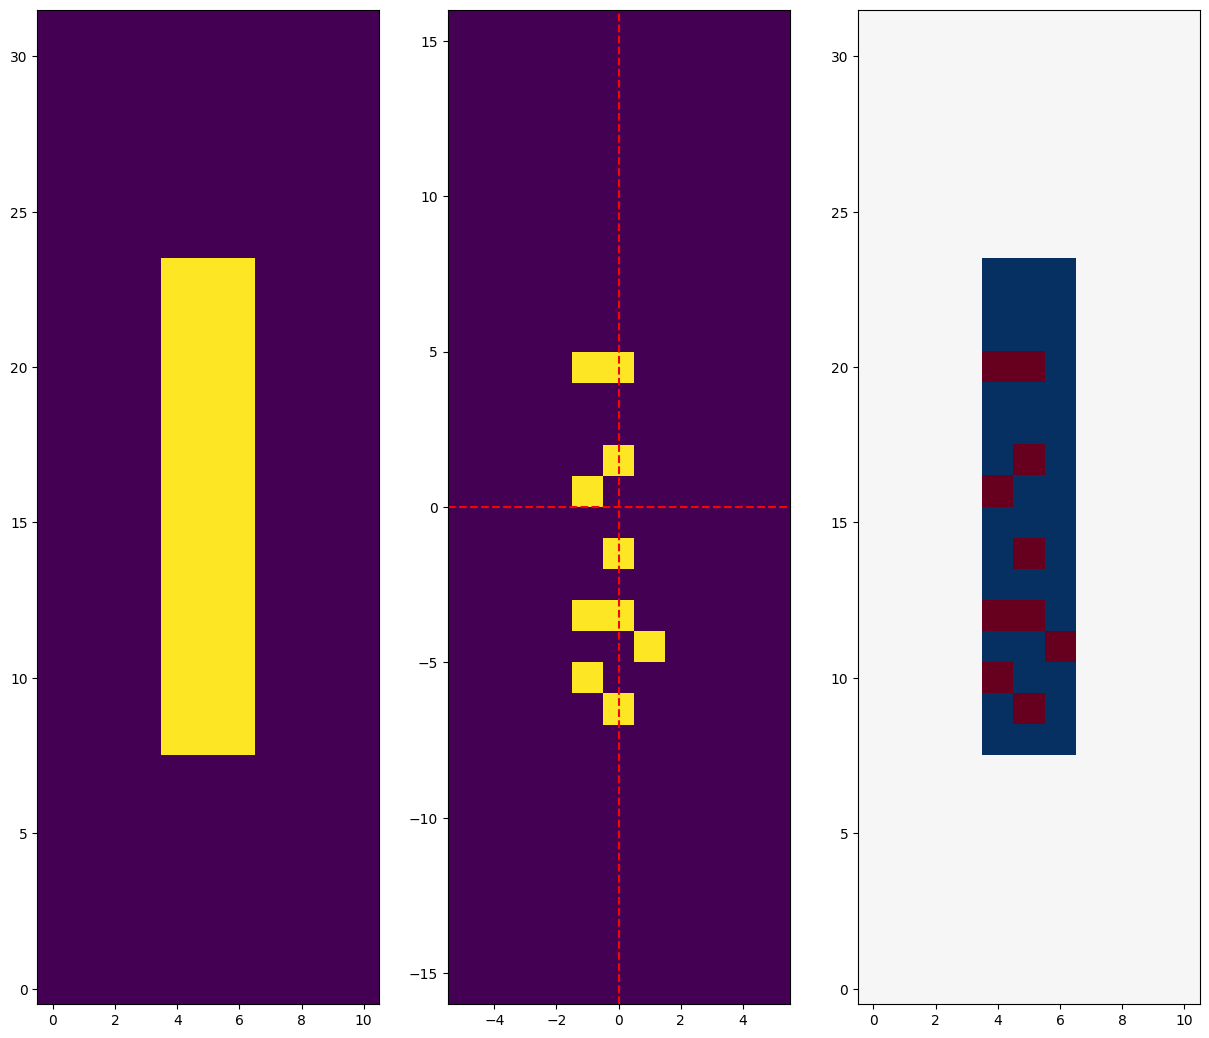

In [19]:
sample_psf_2d(slot_kernel, 10, plot_kernel=True)

Now we want to apply this same procedure but instead using the PSF kernel defined on the Channel object

In [35]:
for c in moxsi_slot.channel_list:
    print(c.name)

filtergram_1
filtergram_2
filtergram_3
filtergram_4
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_pinhole
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot
spectrogram_slot


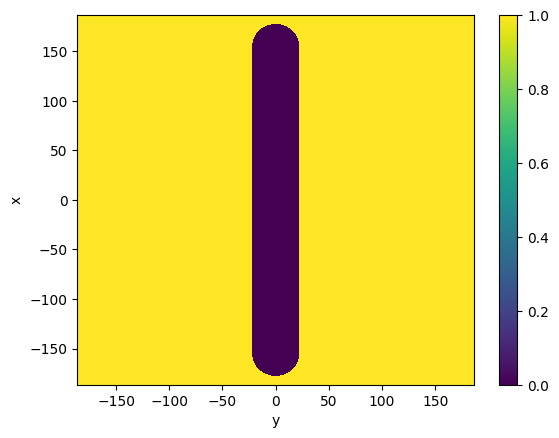

In [43]:
moxsi_slot['spectrogram_slot_-1'].aperture.mask().plot()

In [61]:
slot_psf = moxsi_slot['spectrogram_slot_-1'].psf(wavelength=10*u.AA)

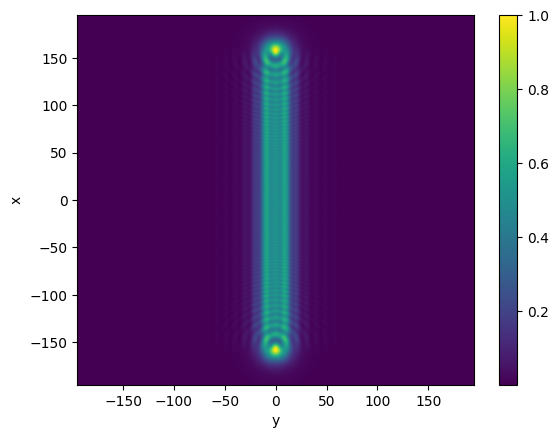

In [64]:
moxsi_slot['spectrogram_slot_-1'].psf(wavelength=20*u.AA)[0].plot()

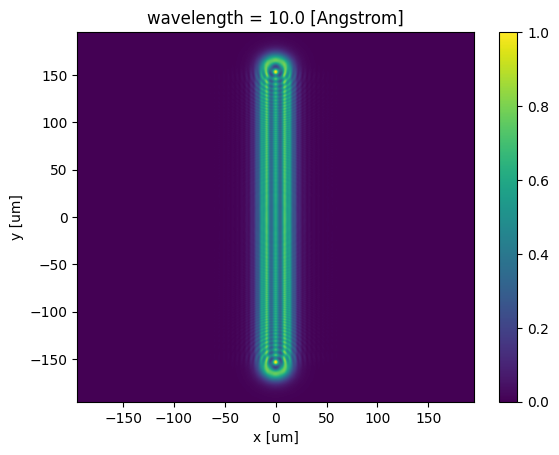

In [29]:
moxsi['spectrogram_slot_-11'].psf[0].plot()

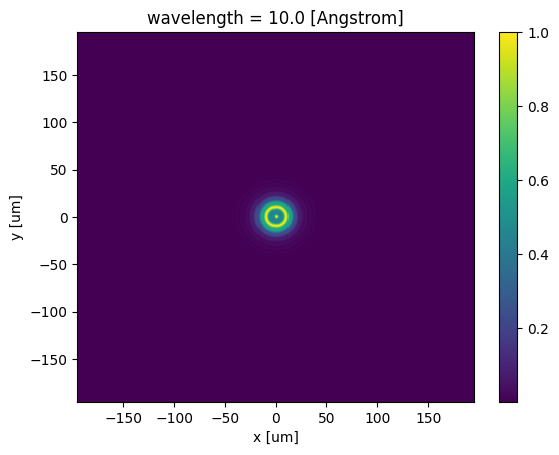

In [28]:
moxsi['spectrogram_pinhole_-11'].psf[0].plot()

In [37]:
np.diff(moxsi['spectrogram_pinhole_-11'].psf.delta_pixel_x)

array([0.15074212, 0.15074212, 0.15074212, 0.15074212, 0.15074212,
       0.15074212, 0.15074212, 0.15074212, 0.15074212, 0.15074212,
       0.15074212, 0.15074212, 0.15074212, 0.15074212, 0.15074212,
       0.15074212, 0.15074212, 0.15074212, 0.15074212, 0.15074212,
       0.15074212, 0.15074212, 0.15074212, 0.15074212, 0.15074212,
       0.15074212, 0.15074212, 0.15074212, 0.15074212, 0.15074212,
       0.15074212, 0.15074212, 0.15074212, 0.15074212, 0.15074212,
       0.15074212, 0.15074212, 0.15074212, 0.15074212, 0.15074212,
       0.15074212, 0.15074212, 0.15074212, 0.15074212, 0.15074212,
       0.15074212, 0.15074212, 0.15074212, 0.15074212, 0.15074212,
       0.15074212, 0.15074212, 0.15074212, 0.15074212, 0.15074212,
       0.15074212, 0.15074212, 0.15074212, 0.15074212, 0.15074212,
       0.15074212, 0.15074212, 0.15074212, 0.15074212, 0.15074212,
       0.15074212, 0.15074212, 0.15074212, 0.15074212, 0.15074212,
       0.15074212, 0.15074212, 0.15074212, 0.15074212, 0.15074

In [38]:
np.diff(moxsi['spectrogram_slot_-11'].psf.delta_pixel_x)

array([0.0186826, 0.0186826, 0.0186826, ..., 0.0186826, 0.0186826,
       0.0186826])

Here do a test of the PSF scatter calculation within the intensity projection for a channel we know will have few counts and one we know will have many more to see how poorly this is going to scale...

In [24]:
det_cube = project_spectral_cube(instr_cube,
                                 slot_o1_channel,
                                 wcs_to_celestial_frame(spec_cube.wcs).observer,
                                 dt=60*u.s,
                                 interval=60*u.s,
                                 apply_gain_conversion=False,
                                 apply_electron_conversion=False)

Automatic pdb calling has been turned OFF


  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]


In [27]:
from astropy.visualization import LogStretch, ImageNormalize

<WCSAxes: >

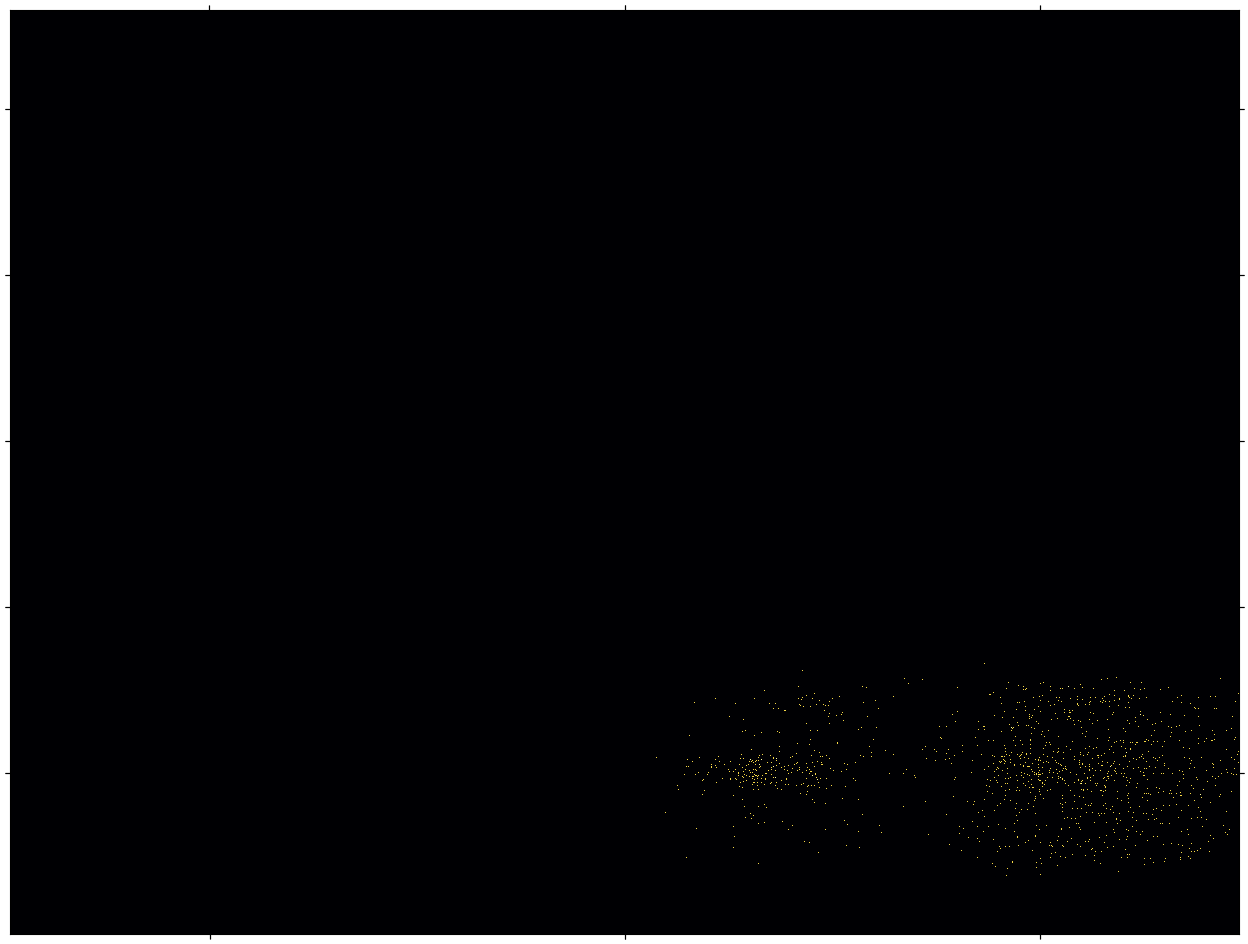

In [28]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(projection=det_cube[0].wcs)
det_cube[0].plot(norm=ImageNormalize(stretch=LogStretch()),axes=ax,interpolation='none',cmap='inferno')